Name
Description
Date Created
Last date updated

In [43]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import sys  
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [44]:
# install openpyxl
!{sys.executable} -m pip install openpyxl

In [62]:
## read in data
excel = "data4visualizations.xlsx"
aero_sheet = pd.read_excel(excel, sheet_name='aerosol_pov_mean',index_col=None)
co_sheet = pd.read_excel(excel, sheet_name='co_pov_mean', index_col=None)

print(co_sheet)

  Unnamed: 0  gr8er_than_75  less_than_25
0     co_pre       0.034573      0.034161
1  co_during       0.095648      0.089106
2    co_post       0.047877      0.047461


In [46]:
# bring in samples
co_pre_75 = pd.read_excel(excel, sheet_name='copresample75',index_col=None)
co_pre_25 = pd.read_excel(excel, sheet_name='copresample25', index_col=None)

co_dur_25 = pd.read_excel(excel, sheet_name='co_durSample25', index_col=None)
co_dur_75 = pd.read_excel(excel, sheet_name='co_durSample75',index_col=None)

co_post_75 = pd.read_excel(excel, sheet_name='co_postSample75', index_col=None)
co_post_25 = pd.read_excel(excel, sheet_name='co_postSample25', index_col=None)

#co_post_25
# co_post_75

#aerosol_pre_25
#aerosol_pre_75
#aerosol_dur_25
#aerosol_dur_75
#aerosol_post_25
#aerosol_post_75


## Graphs

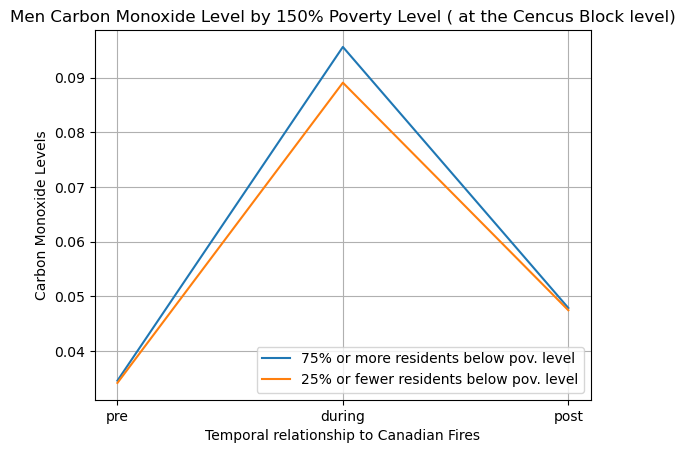

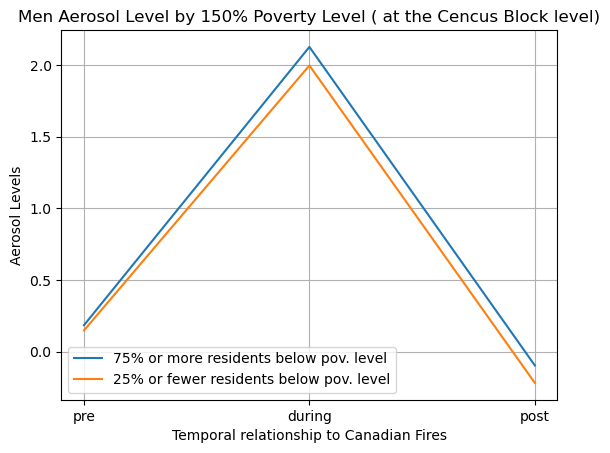

In [66]:
def graph(df, ColName75, ColName25, AorCO):
    '''

    This function takes four args
    1. name of the dataframe
    2. column name 1
    3. column anme 2
    4. whether or not its aerosol or co (string)

    and creates a line plot where the x-axis is pre, during, post values for co or aerosol in relation to the canadian wildfires in June 2023

    
    '''
    x_labels = ['pre', 'during', 'post']

    # Plot first line from first sheet
    plt.plot(x_labels, df[ColName75], label='75% or more residents below pov. level')
    plt.plot(x_labels, df[ColName25], label='25% or fewer residents below pov. level')

    # Add labels and title
    plt.xlabel('Temporal relationship to Canadian Fires')
    plt.ylabel('{} Levels'.format(AorCO)) ## change here for CO/Aerosol
    plt.title('Mean {} Level by 150% Poverty Level ( at the Cencus Block level)'.format(AorCO)) # change here for 
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

graph(co_sheet, 'gr8er_than_75', 'less_than_25', "Carbon Monoxide")
graph(aero_sheet, 'gr8er_than_75', 'less_than_25', "Aerosol")

## Statistical Test


### Stat Function

In [12]:
def statAnalysis(df, colNamedf, df2, colNamedf2):
    '''
    
    This function takes four args
    1. df = first dataframe
    2. colNamedf = column name for first dataframe
    3. df2 = second dataframe
    4. colNamedf2 = column name for second df

    and 
    1. tests for normal distibution
    2. plots a histogram only for data that is Normally distibuted.
    if one or both histograms are plotted, they are normal
    3. if it is not normaly distibuted, perfroms a MannWhitney test
    
    '''
    ## first df
    column_of_interest = df[colNamedf]
    column_of_interest2= df2[colNamedf2]
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(column_of_interest)
    statistic2, p_value2 = shapiro(column_of_interest2)

    # Print the results
    print("-------------------------------------------------------------------------------{} vs {}---start".format(colNamedf, colNamedf2))
    print("Shapiro-Wilk Test {}:".format(colNamedf))
    print("Test Statistic:", statistic)
    print("p-value:", p_value)
    print("----------------------------------------")

      # Print the results df2
    print("Shapiro-Wilk Test {}:".format(colNamedf2))
    print("Test Statistic:", statistic2)
    print("p-value:", p_value2)
    print("----------------------------------------")
    
    # Check the significance level
    alpha = 0.05
    if p_value > alpha and p_value2 > alpha:
        print("The data looks normally distributed (fail to reject H0)")
        plt.hist(df[colNamedf], bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title("Histogram of {}".format(colNamedf))
        plt.grid(True)
        plt.show()

        print("----------------------------------------")

        plt.hist(df2[colNamedf2], bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title("Histogram of {}".format(colNamedf2))
        plt.grid(True)
        plt.show()
        print("----------------------------------------")
    else:
        print("The data does not look normally distributed (reject H0)")
        print("note: if one histogram is plotted, that data is normally distibuted...")
        print("----------------------------------------")
        statistic, p_value = mannwhitneyu(df, df2) # if it fails the Hypothesis test, it will preform a mannwhitney bc its not normalized

        # Print the results
        print("Mann-Whitney U Test {} vs {}:".format(colNamedf, colNamedf2))
        print("Test Statistic:", statistic)
        print("p-value:", p_value)

        # Check the significance level
        alpha = 0.0001 # max 0.05 
        if p_value > alpha:
            print("----------------------------------------")
            print("There is no significant difference between the aerosol levels of the two areas")
            print("----------------------------------------")
        else:
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("There is a significant difference between the aerosol levels of {} and {}".format(colNamedf, colNamedf2))
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("----------------------------------------------------------------------------{} vs {}---end".format(colNamedf, colNamedf2))
        

In [13]:

statAnalysis(co_pre_75, 'copresample75', co_pre_25, 'copresample25')
statAnalysis(co_dur_75, 'co_durSample75', co_dur_25, 'co_durSample25')


-------------------------------------------------------------------------------copresample75 vs copresample25---start
Shapiro-Wilk Test copresample75:
Test Statistic: 0.9862560356044754
p-value: 1.8174099383837593e-06
----------------------------------------
Shapiro-Wilk Test copresample25:
Test Statistic: 0.9760915755380984
p-value: 1.0778937162327386e-09
----------------------------------------
The data does not look normally distributed (reject H0)
note: if one histogram is plotted, that data is normally distibuted...
----------------------------------------
Mann-Whitney U Test copresample75 vs copresample25:
Test Statistic: [312642.]
p-value: [3.59374375e-05]
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
There is a significant difference between the aerosol levels of copresample75 and copresample25
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
----------------------------------------------------------------------------copresample75 vs copresample25---end
-------------------------

---------------------------------------------------------------------------------

#### independent functions for mannwhit and hist

In [110]:
def hist(df, colName):
    plt.hist(df[colName], bins=10, color='blue', alpha=0.7)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title("Histogram of {}".format(colName))
    plt.grid(True)
    plt.show()

#hist(co_pre_75, 'copresample75')

In [111]:
#Perform Mann-Whitney U test
def mannwhit(df1, df2):
    statistic, p_value = mannwhitneyu(df1, df2)

    # Print the results
    print("Mann-Whitney U Test:")
    print("Test Statistic:", statistic)
    print("p-value:", p_value)

    # Check the significance level
    alpha = 0.0001 # max 0.05 
    if p_value > alpha:
        print("There is no significant difference between the aerosol levels of the two areas")
    else:
        print("There is a significant difference between the aerosol levels of the two neighborhoods")


mannwhit(co_pre_75, co_pre_25)

Mann-Whitney U Test:
Test Statistic: [312642.]
p-value: [3.59374375e-05]
There is a significant difference between the aerosol levels of the two neighborhoods
